<a href="https://colab.research.google.com/github/Zewtta/PEL219_2025_RedesNeuraisArtificiais/blob/main/PEL_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarefa 3
##Aluno: Matheus Vieira Martins
##Mestrado Eng. Mecânica

#### Anotações de aulas:
* Use o Keras para classificar números da base de dados MNIST
* O dataset já existe no TensorFlow
* A camada Flatten
* Use a camada Dense do Keras
* Explore diversos tipos de arquiteturas, camadas, neurônios:

  - O número de neurônios em cada camada
  - Adicionar mais camadas.
  - Mudar a função de ativação.
  - Mudar a função de erro.
  - Mudar o algoritmo de descida de gradiente para outros mais modernos...

* NORMALIZAR OS DADOS (Diversos tipos de métodos de normalização):
  - Standardization
  - Decimal scaling
  - Z-score
  - Median and MAD
  - Double sigmoid function
  - tanh-estimators

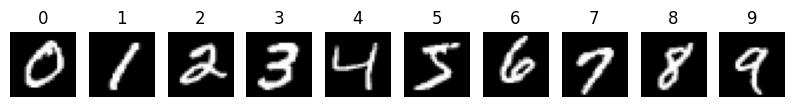

In [15]:
#Verificar as imagens da base só para entender

from keras.datasets import mnist
import matplotlib.pyplot as plt

# Carrega as variáveis de x e y treino e teste com o dataset do mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Gera figura
plt.figure(figsize=(10, 10))

# Adiciona 10 mini imagens dentro da figura gerada com um exemplo do numero usando a base de testes
for i in range(10):
    idx = (y_train == i).nonzero()[0][0]
    plt.subplot(10, 10, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(str(i))
    plt.axis('off')
plt.show()

### Teste 01:
* sigmoide
* 1569 neuronios na camada intermediária
* 10 neuronios de saída
* 5 épocas

In [16]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1569, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 5 épocas
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.89

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - categorical_accuracy: 0.5464 - loss: 1.6451
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.8484 - loss: 0.6349
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.8749 - loss: 0.4775
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.8837 - loss: 0.4222
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - categorical_accuracy: 0.8914 - loss: 0.3894
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - categorical_accuracy: 0.8810 - loss: 0.4147


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1569)           │     1,231,665 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        15,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,247,367 (4.76 MB)

 Trainable params: 1,247,365 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.8991000056266785


### Teste 02:
* sigmoide
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 5 épocas

In [17]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 5 épocas
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.90
# Accuracy de 1569 é aproximadamente a mesma que 128 portanto é desncessário tantos neurônios

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.5636 - loss: 1.8268
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8420 - loss: 0.7725
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8703 - loss: 0.5457
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8831 - loss: 0.4547
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8894 - loss: 0.4115
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.8832 - loss: 0.4221


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9004999995231628


### Teste 03:
* sigmoide
* 10 neuronios na camada intermediária
* 10 neuronios de saída
* 5 épocas

In [18]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 5 épocas
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.86
# Accuracy de 10 é 4% menor que com 128 porém com 93% menos parâmetros (apenas 31.11 KB vs 397.55 KB de parâmetros com 128)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.3579 - loss: 2.1027
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.6867 - loss: 1.3874
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.7717 - loss: 1.0142
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8216 - loss: 0.8207
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8470 - loss: 0.6891
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.8446 - loss: 0.6677


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,962 (31.11 KB)

 Trainable params: 7,960 (31.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.8646000027656555


### Teste 04:
* sigmoide
* 1 neuronios na camada intermediária
* 10 neuronios de saída
* 5 épocas

In [19]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 5 épocas
model.fit(x_train, y_train, epochs=5, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.22
# Accuracy de 1 é terrível, faz sentido reduzir os neurônios para obter eficiência até certo ponto

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.1071 - loss: 2.2883
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.1922 - loss: 2.2036
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.2073 - loss: 2.1189
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.2115 - loss: 2.0540
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - categorical_accuracy: 0.2173 - loss: 2.0040
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.2204 - loss: 1.9885


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │           785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807 (3.16 KB)

 Trainable params: 805 (3.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.2206999957561493


### Teste 05:
Aumentando as épocas para verificar se melhora a acurácia
* sigmoide
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 20 épocas (4x)

In [20]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 20 épocas
model.fit(x_train, y_train, epochs=20, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.92
# Aumentar as épocas em 4x melhorou 2% do resultado (Comparando com 5 épocas)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.5430 - loss: 1.8400
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8361 - loss: 0.7869
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8685 - loss: 0.5538
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8819 - loss: 0.4632
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8887 - loss: 0.4161
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8947 - loss: 0.3859
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9005 - loss: 0.3605
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9037 - loss: 0.3438
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9038 - loss: 0.3401
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9074 - loss: 0.3263

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9259999990463257


### Teste 06:
Aumentando as épocas para verificar se melhora a acurácia
* sigmoide
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 50 épocas (10x)

In [21]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 50 épocas
model.fit(x_train, y_train, epochs=50, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)

# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Anotação do resultado: Test accuracy: 0.94
# Aumentar as épocas em 10x melhorou 4% do resultado (Comparando com 5 épocas)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.5411 - loss: 1.8399
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8399 - loss: 0.7753
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.8681 - loss: 0.5471
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8817 - loss: 0.4596
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.8884 - loss: 0.4165
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8940 - loss: 0.3862
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8979 - loss: 0.3664
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - categorical_accuracy: 0.9031 - loss: 0.3494
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9052 - loss: 0.3417
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - categorical_accuracy: 0.9081 - loss: 0.3245

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9469000101089478


### Teste 07:
Mantendo alto número de épocas mas adicionando controles adicionais: <br>
<b>Adicionado matriz de confusão<br></b>
<b>Adicionado curva de aprendizado<br></b>

<br>

* sigmoide
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 50 épocas (10x)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.5355 - loss: 1.8136
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8390 - loss: 0.7791
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8705 - loss: 0.5453
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8804 - loss: 0.4617
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8900 - loss: 0.4134
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8942 - loss: 0.3875
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9000 - loss: 0.3617
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9024 - loss: 0.3463
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9054 - loss: 0.3335
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9067 - loss: 0.3239

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9463000297546387


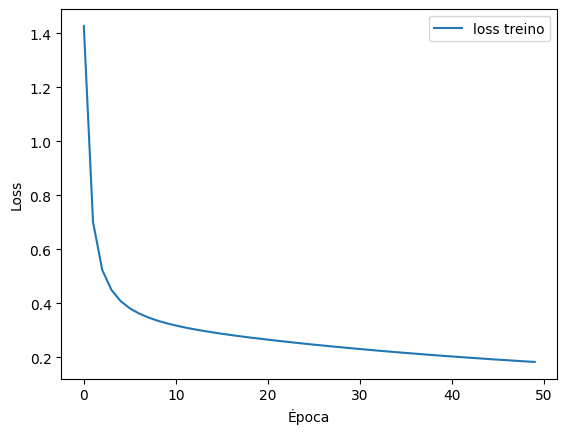

Matriz de Confusão:
 [[ 963    0    2    2    0    3    8    1    1    0]
 [   0 1115    2    2    0    1    4    2    9    0]
 [   9    3  965    9    7    2   12    7   16    2]
 [   0    1   11  961    0   10    1   10   12    4]
 [   1    2    4    0  927    0   10    3    4   31]
 [   9    2    1   22    5  814   14    1   16    8]
 [  10    3    4    1    7    9  918    1    5    0]
 [   1    8   23    4    5    2    0  958    2   25]
 [   3    4    4   17    9   12    9    7  905    4]
 [   9    6    1   10   24    4    1   11    6  937]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.97      0.98      0.98      1135
           2       0.95      0.94      0.94      1032
           3       0.93      0.95      0.94      1010
           4       0.94      0.94      0.94       982
           5       0.95      0.91      0.93       892
           6       0.94      0.96      

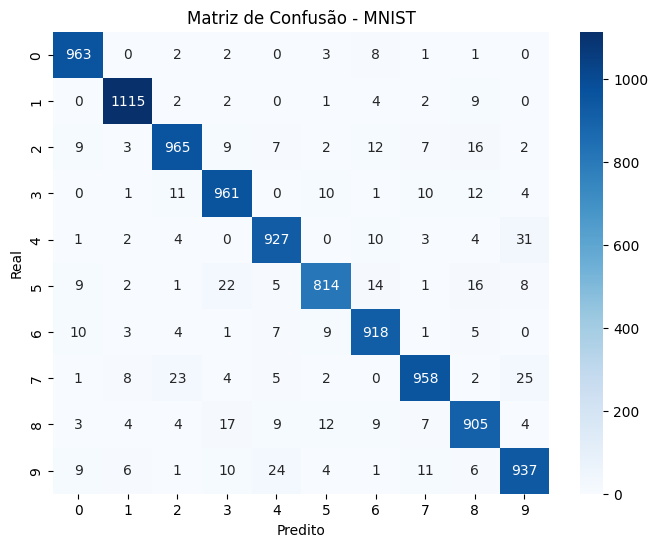

In [5]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 50 épocas - Resultado atribuído ao history para plotar o gráfico
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)
## Previsões
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)



# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Gráfico de erro ao longo das épocas
plt.plot(history.history['loss'], label='loss treino')
plt.legend()
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir no console (opcional)
print("Matriz de Confusão:\n", cm)
print("\nRelatório de Classificação:\n", classification_report(y_true, y_pred))

# Plotar Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.title("Matriz de Confusão - MNIST")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


# Anotação do resultado: Test accuracy: 0.94
# Aumentar as épocas em 10x melhorou 4% do resultado (Comparando com 5 épocas)

### Teste 08:
Reduzindo épocas para 2 para mensurar o impacto: <br>
<b>Adicionado matriz de confusão<br></b>
<b>Adicionado curva de aprendizado<br></b>

<br>

* sigmoide
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 2 épocas (0.5x)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.5472 - loss: 1.8201
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8394 - loss: 0.7763
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.8553 - loss: 0.6194
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.8756999969482422


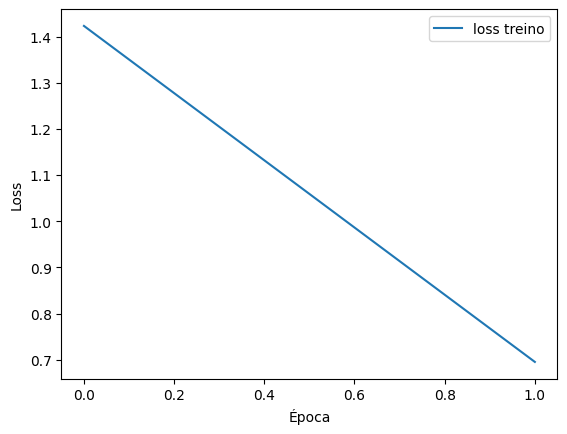

Matriz de Confusão:
 [[ 937    0    6    4    0   14   15    1    3    0]
 [   0 1099    6    5    1    1    4    0   19    0]
 [  15   23  858   21   20    3   24   25   39    4]
 [   5    3   22  884    1   32    7   21   24   11]
 [   1    9    5    0  871    1   19    2    5   69]
 [  25   13    6   73   21  677   31   15   19   12]
 [  18    5   18    2   14   21  879    0    1    0]
 [   4   33   23    1   11    1    0  913    6   36]
 [  16   20   15   48   14   23   17   14  780   27]
 [  12   13   12    8   51   15    1   32    6  859]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       980
           1       0.90      0.97      0.93      1135
           2       0.88      0.83      0.86      1032
           3       0.85      0.88      0.86      1010
           4       0.87      0.89      0.88       982
           5       0.86      0.76      0.81       892
           6       0.88      0.92      

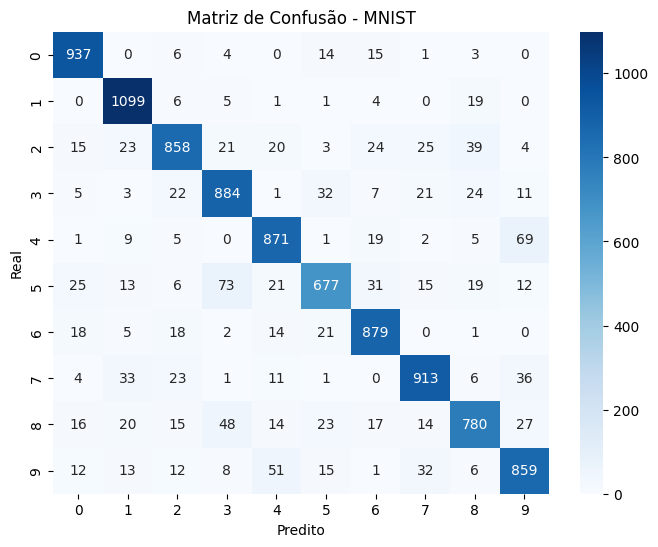

In [6]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo com 2 épocas - Resultado atribuído ao history para plotar o gráfico
history = model.fit(x_train, y_train, epochs=2, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)
## Previsões
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)



# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Gráfico de erro ao longo das épocas
plt.plot(history.history['loss'], label='loss treino')
plt.legend()
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir no console (opcional)
print("Matriz de Confusão:\n", cm)
print("\nRelatório de Classificação:\n", classification_report(y_true, y_pred))

# Plotar Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.title("Matriz de Confusão - MNIST")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


# Anotação do resultado: Test accuracy: 0.87
# Diminuir o numero de épocas pela metade (arredondando para baixo) resultou numa perda de 7%

### Teste 09:
Tentando encontrar um numero de épocas bom que não demore muito <br>
<b>Adicionado matriz de confusão<br></b>
<b>Adicionado curva de aprendizado<br></b>

<br>

* sigmoide
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 15 épocas


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.5359 - loss: 1.8300
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8367 - loss: 0.7819
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.8696 - loss: 0.5444
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8807 - loss: 0.4597
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8904 - loss: 0.4122
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.8947 - loss: 0.3866
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.8992 - loss: 0.3654
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9026 - loss: 0.3480
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9041 - loss: 0.3377
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9072 - loss: 0.3276

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9215999841690063


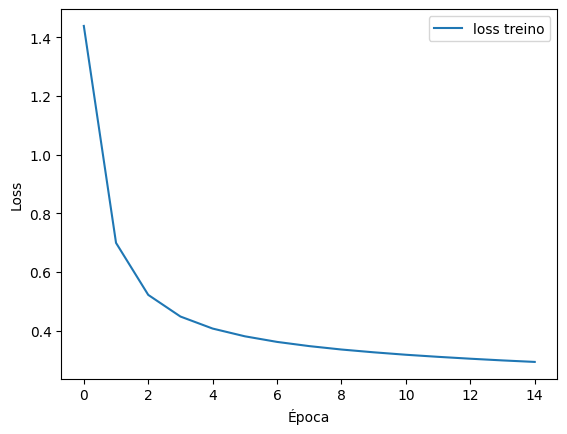

Matriz de Confusão:
 [[ 962    0    3    2    0    3    6    1    3    0]
 [   0 1106    2    3    1    3    4    1   15    0]
 [  11    5  916   16   14    1   13   13   39    4]
 [   2    1   21  924    0   22    2   12   18    8]
 [   1    4    5    1  910    1    9    2    6   43]
 [   9    3    6   45    7  771   12    6   25    8]
 [  13    3    5    1   12   13  906    2    3    0]
 [   3    9   24    6    5    0    0  945    3   33]
 [   7    6    7   24    7   24   10   13  866   10]
 [  13    7    2   12   33    5    1   19    7  910]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.97      0.97      1135
           2       0.92      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.91      0.86      0.89       892
           6       0.94      0.95      

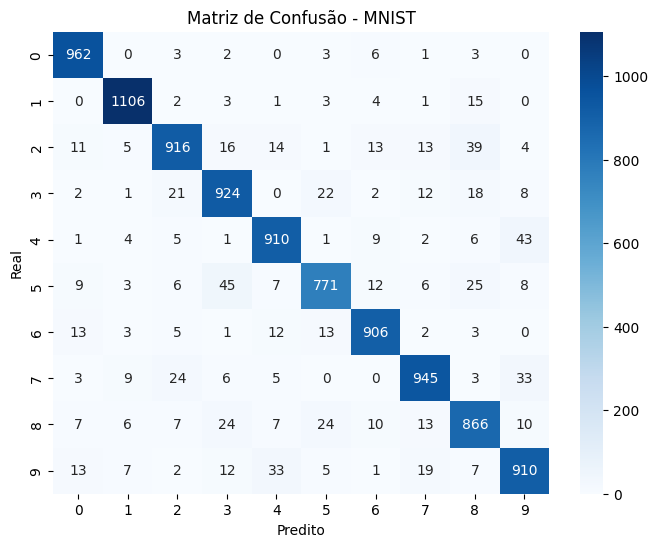

In [7]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo - Resultado atribuído ao history para plotar o gráfico
history = model.fit(x_train, y_train, epochs=15, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)
## Previsões
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)



# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Gráfico de erro ao longo das épocas
plt.plot(history.history['loss'], label='loss treino')
plt.legend()
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir no console (opcional)
print("Matriz de Confusão:\n", cm)
print("\nRelatório de Classificação:\n", classification_report(y_true, y_pred))

# Plotar Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.title("Matriz de Confusão - MNIST")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


# Anotação do resultado: Test accuracy: 0.92
# 15 épocas teve -2% de acurácia em relação à 50, mas otimiza um pouco de tempo (mas não compensa tanto)

### Teste 10:
Trocando função de ativação de 'sigmoid' para 'relu'
* relu
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 50 épocas


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.7251 - loss: 1.0534
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9016 - loss: 0.3609
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9177 - loss: 0.2951
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9263 - loss: 0.2656
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9339 - loss: 0.2364
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - categorical_accuracy: 0.9404 - loss: 0.2134
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9439 - loss: 0.2057
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - categorical_accuracy: 0.9460 - loss: 0.1923
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9524 - loss: 0.1741
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9523 - loss: 0.170

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9760000109672546


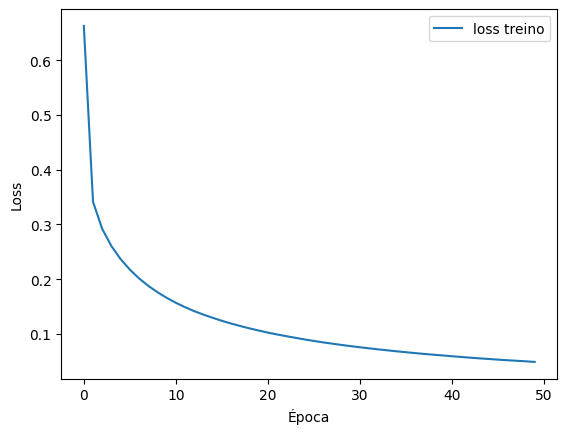

Matriz de Confusão:
 [[ 970    0    1    1    1    1    2    1    2    1]
 [   0 1123    3    1    0    1    3    1    3    0]
 [   4    3 1007    2    4    0    3    5    4    0]
 [   0    0    3  988    0    4    1    3    5    6]
 [   1    0    3    1  957    0    5    2    2   11]
 [   3    1    0   12    1  861    7    0    5    2]
 [   4    3    2    1    4    3  938    0    3    0]
 [   1    9    8    4    0    1    0  997    1    7]
 [   5    0    3    9    3    3    5    3  942    1]
 [   2    5    0    6    9    2    1    5    2  977]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.97      0.98       982
           5       0.98      0.97      0.97       892
           6       0.97      0.98      

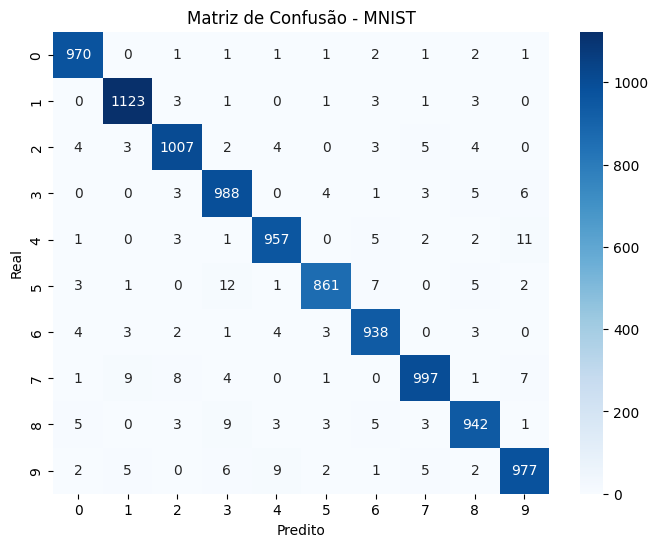

In [8]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo - Resultado atribuído ao history para plotar o gráfico
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)
## Previsões
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)



# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Gráfico de erro ao longo das épocas
plt.plot(history.history['loss'], label='loss treino')
plt.legend()
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir no console (opcional)
print("Matriz de Confusão:\n", cm)
print("\nRelatório de Classificação:\n", classification_report(y_true, y_pred))

# Plotar Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.title("Matriz de Confusão - MNIST")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


# Anotação do resultado: Test accuracy: 0.97
# relu obteve o melhor resultado até então

### Teste 11:
Trocando função de ativação de 'sigmoid' para 'relu'
* relu
* 1569 = (((28*28)*2)+1) - neuronios na camada intermediária
* 10 neuronios de saída
* 50 épocas


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - categorical_accuracy: 0.7903 - loss: 0.9099
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.9102 - loss: 0.3273
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - categorical_accuracy: 0.9233 - loss: 0.2740
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.9341 - loss: 0.2384
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - categorical_accuracy: 0.9407 - loss: 0.2179
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.9460 - loss: 0.1978
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - categorical_accuracy: 0.9498 - loss: 0.1806
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - categorical_accuracy: 0.9544 - loss: 0.1678
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - categorical_accuracy: 0.9577 - loss: 0.1538
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - categorical_accuracy: 0.9599 - lo

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1569)           │     1,231,665 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │        15,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,247,367 (4.76 MB)

 Trainable params: 1,247,365 (4.76 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9797999858856201


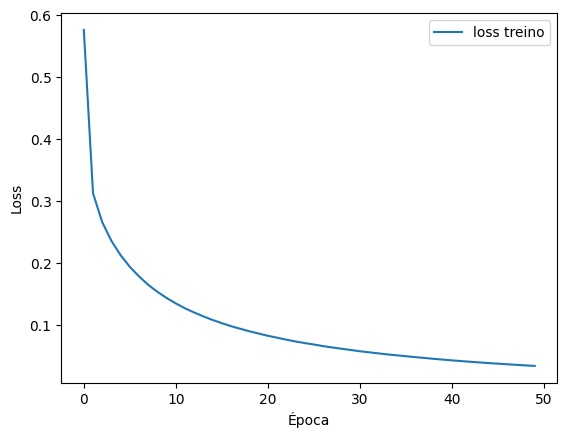

Matriz de Confusão:
 [[ 970    0    1    2    1    0    1    2    2    1]
 [   0 1123    3    1    0    1    3    1    3    0]
 [   4    1 1009    2    2    0    2    5    7    0]
 [   0    0    2  997    0    1    0    3    4    3]
 [   1    0    3    1  966    0    2    1    1    7]
 [   3    0    0    8    2  868    4    1    5    1]
 [   5    3    2    1    6    3  938    0    0    0]
 [   1    4   10    2    1    0    0 1002    3    5]
 [   3    0    4    6    3    3    2    2  950    1]
 [   3    5    0    7    9    1    1    5    3  975]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.98      

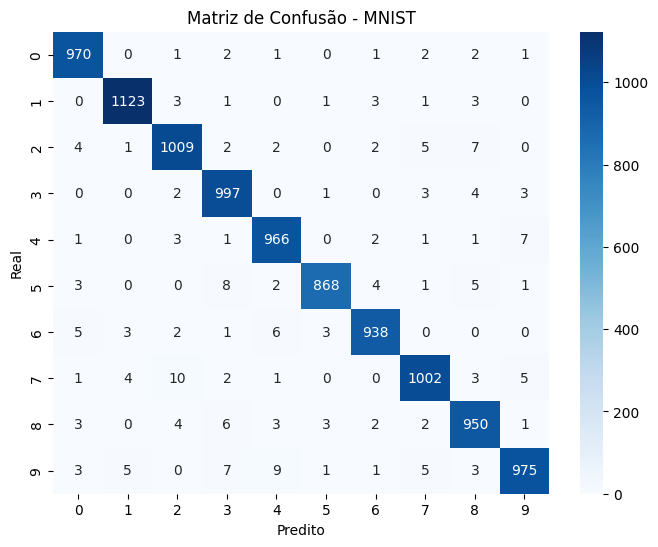

In [9]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(1569, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo - Resultado atribuído ao history para plotar o gráfico
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)
## Previsões
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)



# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Gráfico de erro ao longo das épocas
plt.plot(history.history['loss'], label='loss treino')
plt.legend()
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir no console (opcional)
print("Matriz de Confusão:\n", cm)
print("\nRelatório de Classificação:\n", classification_report(y_true, y_pred))

# Plotar Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.title("Matriz de Confusão - MNIST")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


# Anotação do resultado: Test accuracy: 0.97
# 1569 totalmente desnecessário, toma muito tempo e resultado é o mesmo

### Teste 12:
Trocando função de ativação de 'sigmoid' para 'relu' e aumentando ainda mais as épocas
* relu
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 100 épocas


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.7188 - loss: 1.0588
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9031 - loss: 0.3547
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9165 - loss: 0.3018
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9274 - loss: 0.2633
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - categorical_accuracy: 0.9323 - loss: 0.2421
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9380 - loss: 0.2231
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9426 - loss: 0.2055
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.9460 - loss: 0.1920
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9511 - loss: 0.1744
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9524 - l

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.9772999882698059


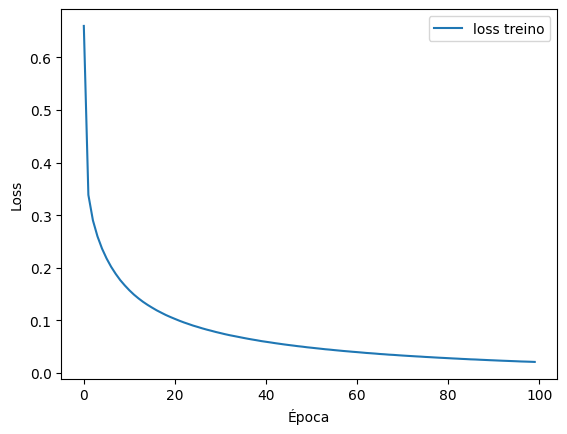

Matriz de Confusão:
 [[ 971    0    1    1    1    0    2    1    1    2]
 [   0 1123    4    0    0    1    2    2    3    0]
 [   6    2 1002    3    3    0    4    4    8    0]
 [   0    1    6  979    1    8    1    2    4    8]
 [   0    0    3    0  958    0    7    3    0   11]
 [   3    1    0    5    1  869    4    2    5    2]
 [   6    3    2    1    2    3  938    0    3    0]
 [   1    4    8    1    0    0    0 1006    4    4]
 [   4    0    5    4    3    2    2    4  947    3]
 [   3    2    0    3    6    3    2    5    5  980]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.98      0.98      

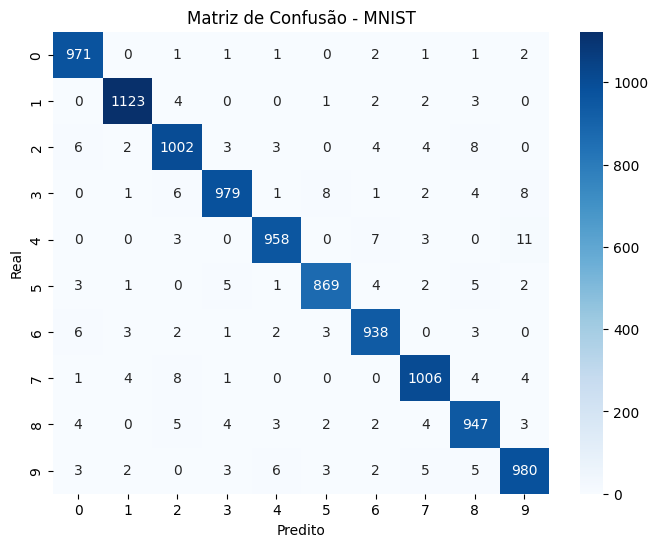

In [10]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo - Resultado atribuído ao history para plotar o gráfico
history = model.fit(x_train, y_train, epochs=100, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)
## Previsões
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)



# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Gráfico de erro ao longo das épocas
plt.plot(history.history['loss'], label='loss treino')
plt.legend()
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir no console (opcional)
print("Matriz de Confusão:\n", cm)
print("\nRelatório de Classificação:\n", classification_report(y_true, y_pred))

# Plotar Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.title("Matriz de Confusão - MNIST")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


# Anotação do resultado: Test accuracy: 0.97
# 100 épocas tem o mesmo resultado que 50 de 97% portanto tempo desnecessário

### Teste 13:
Trocando função de ativação para 'softmax'
* softmax
* 128 neuronios na camada intermediária
* 10 neuronios de saída
* 50 épocas


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.1172 - loss: 2.3007
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.1137 - loss: 2.2965
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.1186 - loss: 2.2916
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.2094 - loss: 2.2482
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.2147 - loss: 2.1619
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.3283 - loss: 1.9795
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.3358 - loss: 1.7233
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.3241 - loss: 1.5993
Epoch 9/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - categorical_accuracy: 0.3262 - loss: 1.5279
Epoch 10/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.3331 - loss: 1.4913

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,772 (397.55 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Test accuracy: 0.4537999927997589


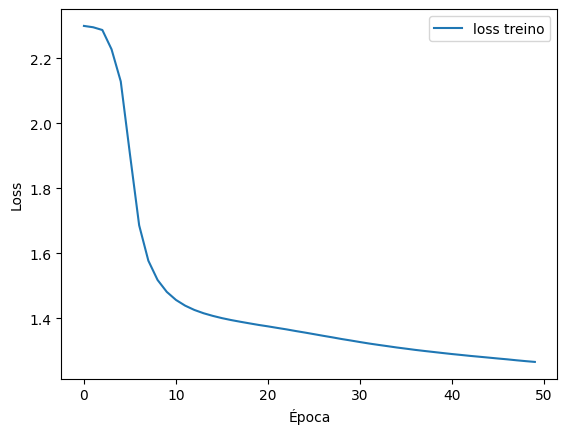

Matriz de Confusão:
 [[ 862    0   43    1    2    1   67    2    2    0]
 [   0 1100    4   25    0    0    1    0    4    1]
 [ 180   31  370   80   13    8  141   11  191    7]
 [   4  427   29  375    2    1    8    3  141   20]
 [  12    4    9    6  280    7   29  516    5  114]
 [  23   24  199  163   10   22   23    4  410   14]
 [ 744    0   86    5    7    0  106    2    8    0]
 [   2   20    6   16   24    4    1  902    2   51]
 [  17   63  201  216   10   28   16    4  402   17]
 [   6    9    4    9   61    5    4  783    9  119]]

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.47      0.88      0.61       980
           1       0.66      0.97      0.78      1135
           2       0.39      0.36      0.37      1032
           3       0.42      0.37      0.39      1010
           4       0.68      0.29      0.40       982
           5       0.29      0.02      0.05       892
           6       0.27      0.11      

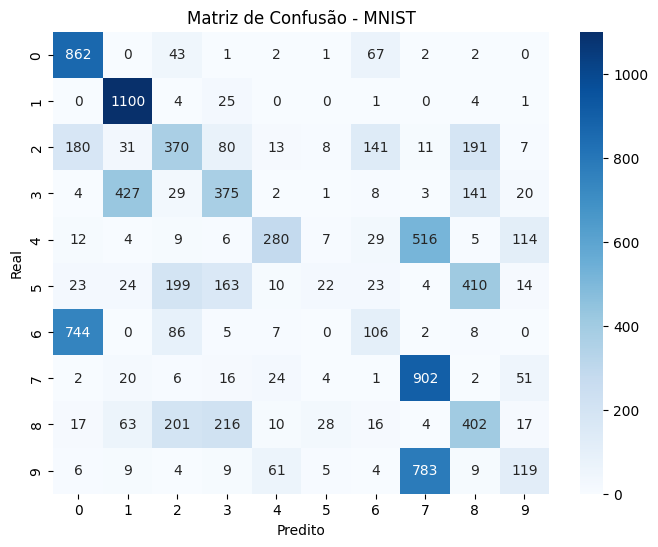

In [11]:
#load dados do MNIST

from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normaliza os dados (255 bit)
x_train = x_train / 255.0
x_test = x_test / 255.0

# aplica one hot code
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


# Carrega o modelo MLP do Keras. Hiperparâmetros: sigmoide, 1596 inter e 10 saída (saída não vai mudar serão 10 números sempre)

#testar com relu
#testar com softmax

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='softmax'))
model.add(Dense(10, activation='sigmoid'))

model.compile('sgd','categorical_crossentropy',metrics=['categorical_accuracy'])

# Treinando o modelo - Resultado atribuído ao history para plotar o gráfico
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

# Avaliando modelos
loss, accuracy = model.evaluate(x_test, y_test)
## Previsões
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)



# Resultados
model.summary()
print(f'Test accuracy: {accuracy}')

# Gráfico de erro ao longo das épocas
plt.plot(history.history['loss'], label='loss treino')
plt.legend()
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()

# Matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Exibir no console (opcional)
print("Matriz de Confusão:\n", cm)
print("\nRelatório de Classificação:\n", classification_report(y_true, y_pred))

# Plotar Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))
plt.title("Matriz de Confusão - MNIST")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()


# Anotação do resultado: Test accuracy: 0.45
# 100 épocas tem o mesmo resultado que 50 de 97% portanto tempo desnecessário